## <span style="color:blue">Pythonでの株価のデータ取得</span>

Yahooファイナンスからの株価データを取得したい．

**内容**
- yahooファイナンスのホームページ上にある株価情報を取得.以下がそのホームページの例

![Ex1](fig/yahoofinance_ex.png)

- 株価のローソクチャート
- 移動平均線，出来高の追加

**問題点**
- yahooはスプレイティング禁止
    - このプログラム自体もダメ?
- 本プログラムの取得できるデータは最長で約1か月と短い
    - 違うサイトから取得すべき，例えば[[ここ]](https://valuekabu.net/price-index-download/)を参考に

**参考**
- [[1]](https://qiita.com/SacredTubes/items/4938157794e840cbc6e5)：yahooファイナンスからの情報取得の方法
- [[2]](https://note.nkmk.me/python-pandas-matplotlib-candlestick-chart/)：ローソクチャートや移動平均線，出来高の図

### ライブラリのインポート

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance

### 株の銘柄コードと指定期間

In [ ]:
stockCode='4385.T';#'銘柄コード.市場コード'
DateStrings = ['2018-08-26','2019-09-03']; #開始日,終了日

In [3]:
sDateTmp= dt.datetime.strptime(DateStrings[0],'%Y-%m-%d')
eDateTmp= dt.datetime.strptime(DateStrings[1],'%Y-%m-%d')

### Yahooファイナンスからデータ読み込み

In [4]:
baseURLTimeseries = "https://info.finance.yahoo.co.jp/history/?code=";
getURL = baseURLTimeseries+stockCode+"&sy="+str(sDateTmp.year)+\
        "&sm="+str(sDateTmp.month)+"&sd="+str(sDateTmp.day)+\
        "&ey="+str(eDateTmp.year)+"&em="+str(eDateTmp.month)+\
        "&ed="+str(eDateTmp.day)+"&tm=d";
str = pd.read_html(getURL);

### 銘柄の名前・現在の株価・前日比

In [5]:
stock_name=str[0];
stock_name.drop(columns=1).rename(columns={0:"銘柄名",2:"現在の価格", 3:"前日比"})

,銘柄名,現在の価格,前日比
0,(株)メルカリ,2153,前日比+96（+4.67%）


### 指定期間での株価の情報

In [6]:
stock_info=str[1].replace('(\d*)年(\d*)月(\d*)日', r'\1-\2-\3', regex=True)#年月日表記を数字のみ表現に変換
stock_info['日付'] = pd.to_datetime(stock_info['日付'])#日付の型変更
stock_info.set_index('日付', inplace=True)
stock_info.head()

,始値,高値,安値,終値,出来高,調整後終値*
日付,,,,,,
2019-09-03,2568,2623,2540,2567,803800,2567
2019-09-02,2515,2615,2515,2588,968900,2588
2019-08-30,2449,2510,2437,2485,659700,2485
2019-08-29,2448,2481,2435,2451,758800,2451
2019-08-28,2361,2487,2345,2472,1202600,2472


In [7]:
stock_info.tail()

,始値,高値,安値,終値,出来高,調整後終値*
日付,,,,,,
2019-08-13,2635,2635,2390,2420,2519500,2420
2019-08-09,2816,2854,2692,2693,2514000,2693
2019-08-08,2899,3020,2894,2951,1533500,2951
2019-08-07,2875,2888,2798,2882,603900,2882
2019-08-06,2783,2904,2754,2855,556900,2855


### 図の表示

##### ローソクチャートの表示

In [8]:
stock_info_=stock_info.copy()
stock_info_.index = mdates.date2num(stock_info_.index)#日時データを数値に変換
data = stock_info_.reset_index().values#インデックスを解除（データ列を一番左に移動）

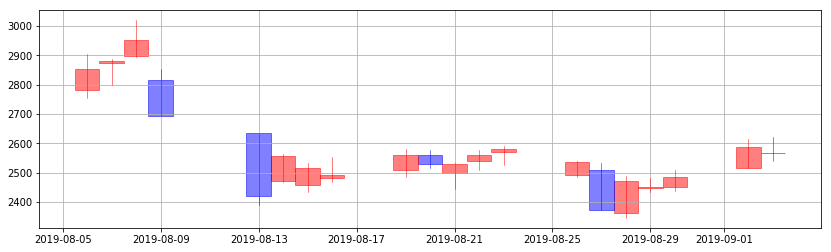

In [9]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1)

#ローソクチャートの表示
mpl_finance.candlestick_ohlc(ax, data, width=1, alpha=0.5, colorup='r', colordown='b');
ax.grid()

#x軸の日時のフォーマット指定
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

##### 移動平均線の追加

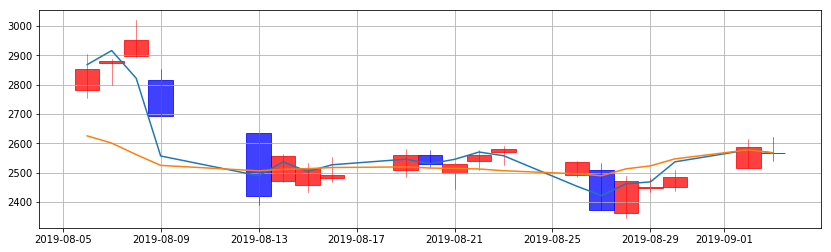

In [29]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1)

mpl_finance.candlestick_ohlc(ax, data, width=1, alpha=0.75, colorup='r', colordown='b')

# 移動平均線，pandas rolling関数使用
ax.plot(stock_info_.index, stock_info_['終値'].rolling(2, min_periods=1).mean())
ax.plot(stock_info_.index, stock_info_['終値'].rolling(13,min_periods=1).mean())

ax.grid()
#x軸の日時のフォーマット指定
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

##### 出来高の追加

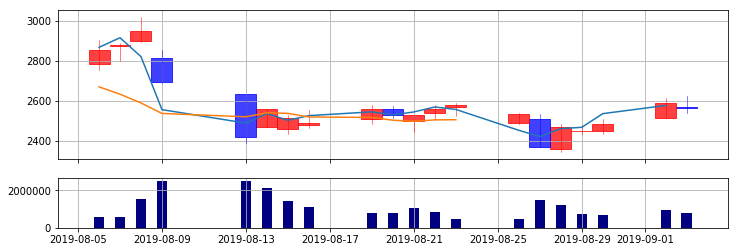

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 4), sharex=True,
                         gridspec_kw={'height_ratios': [3, 1]})

mpl_finance.candlestick_ohlc(axes[0], data, width=1, alpha=0.75, colorup='r', colordown='b')
axes[0].plot(stock_info_.index, stock_info_['終値'].rolling(2).mean())
axes[0].plot(stock_info_.index, stock_info_['終値'].rolling(8).mean())

axes[1].bar(stock_info_.index, stock_info_['出来高'], width=0.5, color='navy')

axes[0].grid()
axes[1].grid()

locator = mdates.AutoDateLocator()
axes[0].xaxis.set_major_locator(locator)
axes[0].xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))